In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns


In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [8]:
data_dup =df.duplicated().any()
data_dup

True

In [9]:
df= df.drop_duplicates()
data_dup =df.duplicated().any()
data_dup

False

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [11]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree


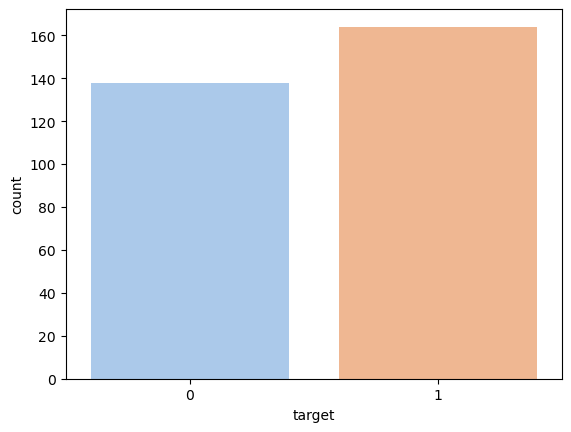

In [13]:
x= df.drop(columns= 'target', axis= 1)
y= df['target']
sns.countplot(data= df, x='target', palette= 'pastel')
plt.show()

In [14]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  
0        2   2     3  
1        0   0     3  
2        0   0    

In [15]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64


In [16]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.3, stratify= y, random_state= 0)
print(x.shape,x_train.shape,x_test.shape)

(302, 13) (211, 13) (91, 13)


In [17]:
model1= LogisticRegression()
model2= svm.SVC()
model3= RandomForestClassifier(max_depth=6, n_estimators=20, random_state=10)
model4= tree.DecisionTreeClassifier(criterion="entropy",max_depth=6, random_state=12 )

In [18]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [19]:
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=12)

In [20]:
print(model3)

RandomForestClassifier(max_depth=6, n_estimators=20, random_state=10)


In [21]:
x_pre1= model1.predict(x_train)
x_pre2= model2.predict(x_train)
x_pre3= model3.predict(x_train)
x_pre4= model4.predict(x_train)

train_data1= accuracy_score(x_pre1, y_train)
train_data2= accuracy_score(x_pre2, y_train)
train_data3= accuracy_score(x_pre3, y_train)
train_data4= accuracy_score(x_pre4, y_train)


In [22]:
print(train_data1)

print(train_data2)

print(train_data3)

print(train_data4)

0.8388625592417062
0.6635071090047393
0.966824644549763
0.919431279620853


In [23]:
x_tes1= model1.predict(x_test)
x_tes2= model2.predict(x_test)
x_tes3= model3.predict(x_test)
x_tes4= model4.predict(x_test)

test_data1= accuracy_score(x_tes1, y_test)
test_data2= accuracy_score(x_tes2, y_test)
test_data3= accuracy_score(x_tes3, y_test)
test_data4= accuracy_score(x_tes4, y_test)

In [24]:
print(test_data1)

print(test_data2)

print(test_data3)

print(test_data4)


0.8791208791208791
0.6153846153846154
0.8461538461538461
0.7252747252747253


In [25]:
import pickle

pickle.dump(model1,open('Logistic_model.pkl','wb'))

In [26]:
input_data=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)
in_data_array= np.asarray(input_data)
reshapes= in_data_array.reshape(1,-1)
prediction= model1.predict(reshapes)
print(prediction)
if(prediction[0]== 0):
  print('the person do not have a heart disease')
else:
  print('the person has a heart disease')

[1]
the person has a heart disease


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
# Take input from the user for each data point
age = float(input("Enter the age: "))
sex = float(input("Enter the sex (0 for female, 1 for male): "))
cp = float(input("Enter the chest pain type (1, 2, 3, or 4): "))
trestbps = float(input("Enter the resting blood pressure: "))
chol = float(input("Enter the serum cholesterol level: "))
fbs = float(input("Enter the fasting blood sugar (0 for false, 1 for true): "))
restecg = float(input("Enter the resting electrocardiographic results (0, 1, or 2): "))
thalach = float(input("Enter the maximum heart rate achieved: "))
exang = float(input("Enter exercise induced angina (0 for no, 1 for yes): "))
oldpeak = float(input("Enter the ST depression induced by exercise: "))
slope = float(input("Enter the slope of the peak exercise ST segment (0, 1, or 2): "))
ca = float(input("Enter the number of major vessels (0, 1, 2, 3, or 4): "))
thal = float(input("Enter the thalassemia type (1, 2, 3, or 0): "))

# Create the input_data as a tuple
input_data = (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)

# Convert the input_data to a NumPy array and reshape it
in_data_array = np.asarray(input_data)
reshapes = in_data_array.reshape(1, -1)

# Assuming you have already defined the model3 object and trained the model
prediction = model1.predict(reshapes)

# Check the prediction and display the result
print(prediction)
if prediction[0] == 0:
    print('The person does not have a heart disease.')
else:
    print('The person has a heart disease.')


Enter the age: 20
Enter the sex (0 for female, 1 for male): 0
Enter the chest pain type (1, 2, 3, or 4): 3
Enter the resting blood pressure: 234
Enter the serum cholesterol level: 124
Enter the fasting blood sugar (0 for false, 1 for true): 1
Enter the resting electrocardiographic results (0, 1, or 2): 2
Enter the maximum heart rate achieved: 1.4
Enter exercise induced angina (0 for no, 1 for yes): 1
Enter the ST depression induced by exercise: 234
Enter the slope of the peak exercise ST segment (0, 1, or 2): 2
Enter the number of major vessels (0, 1, 2, 3, or 4): 4
Enter the thalassemia type (1, 2, 3, or 0): 3
[0]
The person does not have a heart disease.


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
